The feedback prize dataset comes with different csv files. Here we are discovering the content of these files and modelling the data. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

**text_and_labels.csv**

In [2]:
file = "../data/feedback_prize/text_and_labels.csv"
df = pd.read_csv(file)
df.head()

,text,tp_Claim,tp_Concluding Statement,tp_Counterclaim,tp_Evidence,tp_Lead,tp_Position,tp_Rebuttal,type
0,Modern humans today are always on their phone....,0,0,0,0,1,0,0,Lead
1,They are some really bad consequences when stu...,0,0,0,0,0,1,0,Position
2,Some certain areas in the United States ban ph...,0,0,0,1,0,0,0,Evidence
3,"When people have phones, they know about certa...",0,0,0,1,0,0,0,Evidence
4,Driving is one of the way how to get around. P...,1,0,0,0,0,0,0,Claim


In [3]:
df.groupby('type').sum()

/tmp/ipykernel_19196/3932782151.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('type').sum()


,tp_Claim,tp_Concluding Statement,tp_Counterclaim,tp_Evidence,tp_Lead,tp_Position,tp_Rebuttal
type,,,,,,,
Claim,50208,0,0,0,0,0,0
Concluding Statement,0,13505,0,0,0,0,0
Counterclaim,0,0,5817,0,0,0,0
Evidence,0,0,0,45702,0,0,0
Lead,0,0,0,0,9305,0,0
Position,0,0,0,0,0,15419,0
Rebuttal,0,0,0,0,0,0,4337


<AxesSubplot: xlabel='type'>

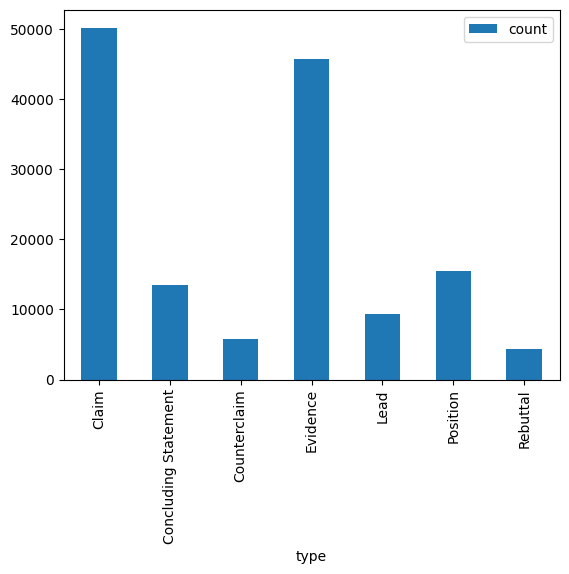

In [4]:
count = df.groupby(by='type').count().reset_index().rename(columns={'text':'count'})
count.plot(x='type', y='count', kind='bar')

<AxesSubplot: xlabel='type'>

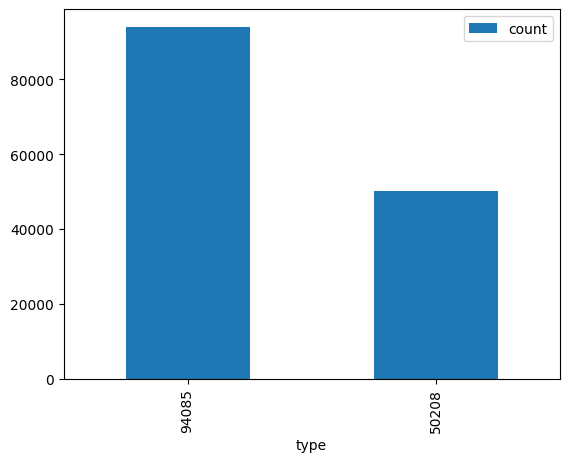

In [5]:
count = df.groupby(by='tp_Claim').count().reset_index().rename(columns={'text':'count'})
count.plot(x='type', y='count', kind='bar')

**corrected_train.csv**

In [9]:
file = "../data/feedback_prize/corrected_train.csv"

df = pd.read_csv(file)
df.head()

,id,discourse_id,discourse_start,discourse_end,discourse_text,discourse_type,discourse_type_num,predictionstring,text_by_index,new_start,new_end,text_by_new_index,new_predictionstring
0,423A1CA112E2,1.622628e+12,8.0,229.0,Modern humans today are always on their phone....,Lead,Lead 1,1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 1...,Modern humans today are always on their phone....,8,230,Modern humans today are always on their phone....,1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 1...
1,423A1CA112E2,1.622628e+12,230.0,312.0,They are some really bad consequences when stu...,Position,Position 1,45 46 47 48 49 50 51 52 53 54 55 56 57 58 59,They are some really bad consequences when stu...,230,313,They are some really bad consequences when stu...,45 46 47 48 49 50 51 52 53 54 55 56 57 58 59
2,423A1CA112E2,1.622628e+12,313.0,401.0,Some certain areas in the United States ban ph...,Evidence,Evidence 1,60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75,Some certain areas in the United States ban ph...,313,401,Some certain areas in the United States ban ph...,60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75
3,423A1CA112E2,1.622628e+12,402.0,758.0,"When people have phones, they know about certa...",Evidence,Evidence 2,76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 9...,"When people have phones, they know about certa...",402,758,"When people have phones, they know about certa...",76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 9...
4,423A1CA112E2,1.622628e+12,759.0,886.0,Driving is one of the way how to get around. P...,Claim,Claim 1,139 140 141 142 143 144 145 146 147 148 149 15...,Driving is one of the way how to get around. P...,759,887,Driving is one of the way how to get around. P...,139 140 141 142 143 144 145 146 147 148 149 15...


<AxesSubplot: xlabel='discourse_type'>

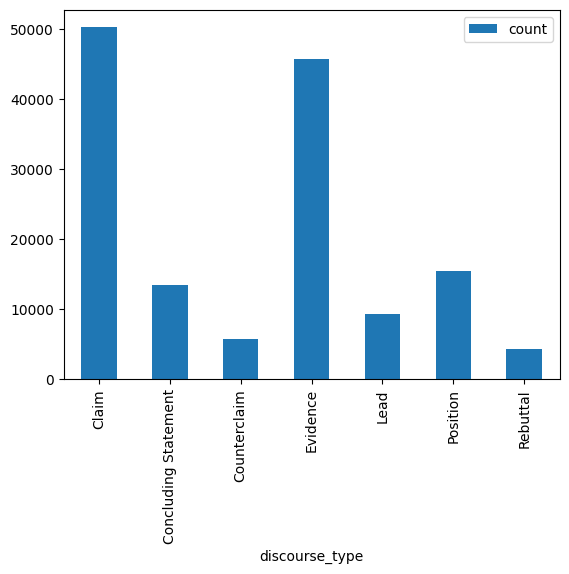

In [10]:
count = df.groupby(by='discourse_type').count().reset_index().rename(columns={'discourse_text':'count'})
count.plot(x='discourse_type', y='count', kind='bar')

**feedback_prize_input.csv**

In [11]:
file = "../data/feedback_prize/feedback_prize_input.csv"

df = pd.read_csv(file)
df.head()

,text,cat_label
0,Modern humans today are always on their phone....,Lead
1,They are some really bad consequences when stu...,Position
2,Some certain areas in the United States ban ph...,Evidence
3,"When people have phones, they know about certa...",Evidence
4,Driving is one of the way how to get around. P...,Claim


<AxesSubplot: xlabel='cat_label'>

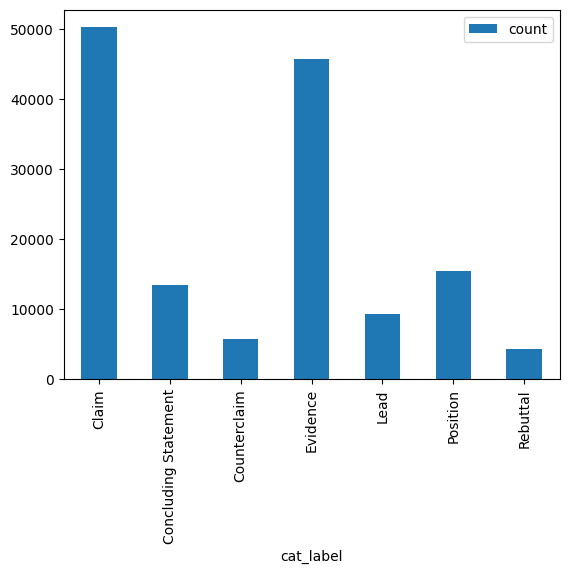

In [12]:
count = df.groupby(by='cat_label').count().reset_index().rename(columns={'text':'count'})
count.plot(x='cat_label', y='count', kind='bar')

The different files seem to contain the same data, we will though be using `feedack_prize_input.csv` as it has a more forward representation of the data [text, label]. 